# TKT4108 Structural dynamics 2

## Solution Exercise 2

**Main topics:** Fourier series, Fourier transforms and spectral densities

**References:** Newland Chapter 4-5

### Problem 1: Fourier series
In this problem we will obtain the Fourier approximation of the periodic function displayed in the figure below.

**Hint**: Take a look at the examples posted in Github


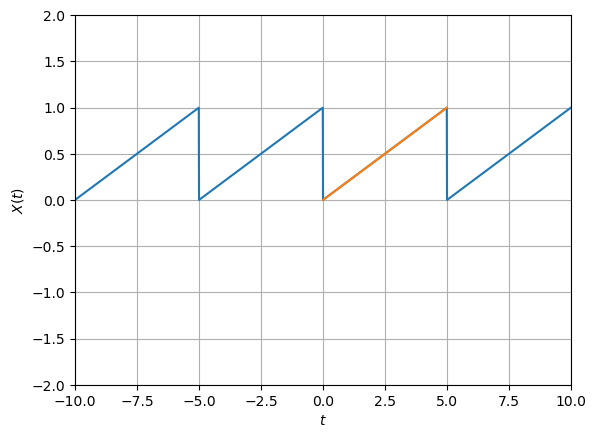

In [31]:
import numpy as np
from matplotlib import pyplot as plt
# 
dt = 0.01 # Time step
t = np.arange(0,5,dt) # time vector
x = t/5 # Initialize the x array
# Plot waveform
plt.figure()
plt.plot(np.hstack((t-10.0,t-5.0, t, t+5.0)),np.hstack((x,x,x,x))); # Plot four periods
plt.plot(t,x); #Plot one period
plt.ylim(-2, 2);
plt.xlim(-10,10);
plt.grid();
plt.xlabel('$t$');
plt.ylabel('$X(t)$');

a) Use the following definition of the Fourier series and obtain analytical expressions for the Fourier coefficients:

$$ X(t) = a_{0} +2 \sum_{k=1}^{\infty} \left( a_k cos\left(\frac{2\pi k}{T}t \right) + b_k sin\left(\frac{2\pi k}{T}t \right)\right)  $$

Here, $a_0$, $a_k$ and $b_k$ are Fourier coefficients given as follows:

$$a_0 = \frac{1}{T} \int_{0}^{T}X(t)dt$$

$$a_k = \frac{1}{T} \int_{0}^{T}X(t)cos\left(\frac{2\pi k}{T}t \right) \: \text{d} t$$

$$b_k = \frac{1}{T} \int_{0}^{T}X(t)sin\left(\frac{2\pi k}{T}t \right)\: \text{d} t$$

#### Solution
Mean value

$$a_0 = \frac{1}{T} \int_{0}^{T}X(t)dt = \frac{1}{5} \int_{0}^{5}\frac{1}{5}t dt  =  \frac{1}{50} \left[  t^2\right]_{0}^{5} dt =  \frac{1}{50} \left[25-0\right]_{0}^{5} dt = \frac{1}{2}$$

$a_k$ term

$$a_k = \frac{1}{T} \int_{0}^{5}X(t)cos\left(\frac{2\pi k}{5}t \right)dt$$

$$a_k = \frac{1}{25} \int_{0}^{5}t \cdot cos\left(\frac{2\pi k}{5}t \right)dt$$

Integration by parts

$$a_k =\frac{1}{25}  \left( \frac{T}{2\pi k}\right[t \sin(\frac{2 \pi}{T}kt)  \left]_{0}^{T}    -\frac{T}{2\pi k} \int_{0}^{T} \sin\left(\frac{2\pi k}{T}t \right)dt \right)$$ 

First term is zero since $\sin(2 \pi k)=0 $


$$a_k =    -\frac{T}{25 \cdot 2\pi k} \int_{0}^{T} \sin\left(\frac{2\pi k}{T}t \right)dt$$ 


$$a_k =    \frac{T}{25 \cdot 2\pi k} \frac{T}{2\pi k} \left[ \cos\left(\frac{2\pi k}{T}t \right) \right]_0^5$$ 

$$a_k =    \frac{T}{25 \cdot 2\pi k} \frac{T}{2\pi k} \left[ \cos\left(2\pi k \right) - \cos\left(0\right) \right]$$ 

$$ a_k = 0$$

The term is zero, which is expected since the wave form is odd.


$b_k$ term

$$b_k = \frac{1}{T} \int_{0}^{T}X(t)\sin\left(\frac{2\pi k}{T}t \right)dt$$

$$b_k = \frac{1}{25} \int_{0}^{5} t \sin\left(\frac{2\pi k}{5}t \right)dt$$

Integration by parts

$$b_k = \frac{1}{25} \left( -\frac{5}{2 \pi k}\left[ t \cos \left(\frac{2\pi k}{5}t \right) \right]_0^5 +\frac{5}{2\pi k}\int_{0}^{5} \cos\left(\frac{2\pi k}{5}t \right)dt \right)$$

$$b_k = \frac{1}{25} \left( -\frac{25}{2 \pi k} \cos \left(2\pi k \right) +\frac{5}{2\pi k}\frac{5}{2\pi k} \left[ \sin\left(\frac{2\pi k}{5}t \right)dt \right]_0^5 \right)$$

$$b_k =  -\frac{1}{2\pi k} $$

b) Make a python code that plots the waveform and the corresponding Fourier approximation. Verify that your Forier series approximation fits the target function and discuss how many terms you need to obtain a resonable approximation of the waveform.

#### Solution


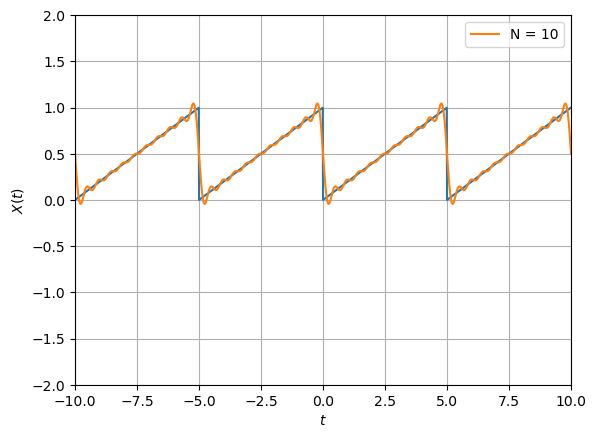

In [32]:
t2 = np.linspace(-10,10,1001)

n_terms = 10

a_0 = 1/2

x_fourier = np.ones(len(t2))*a_0
for k in range(n_terms):
    b_k =-1/2/np.pi/(k+1) 
    x_fourier = x_fourier + 2*b_k*np.sin(2*np.pi*(k+1)/5*t2)
    
    
# Plot waveform and approximation
plt.figure()
plt.plot(np.hstack((t-10.0,t-5.0, t, t+5.0)),np.hstack((x,x,x,x))); # Plot four periods
plt.plot(t2,x_fourier,label = "N = " + str(n_terms)) #Fourier approximation
plt.ylim(-2, 2)
plt.xlim(-10,10)
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$X(t)$')
plt.legend();


The plot and the code above illustrates that the derived Fourier coefficients are correct since the Fourier series converges to the waveform as the number of terms increases. It can also be observed that some rapid oscillations are present where the wave form is discontinious. This is because it is very challenging to describe step changes perfectly using a Fourier series. The small oscillations before and after the drop is called the Gibbs phenomenon. Try to increase the number of terms on observe how many you need to almost remove the oscillations.

c) Also obtain the Fourier series by numpy.fft. Discuss how these coefficeints are related to the ones you found above.

#### Solution
The Fourier series can be obtained by taking the fft of the waveform. Note that we here take the fft of one period of the waveform

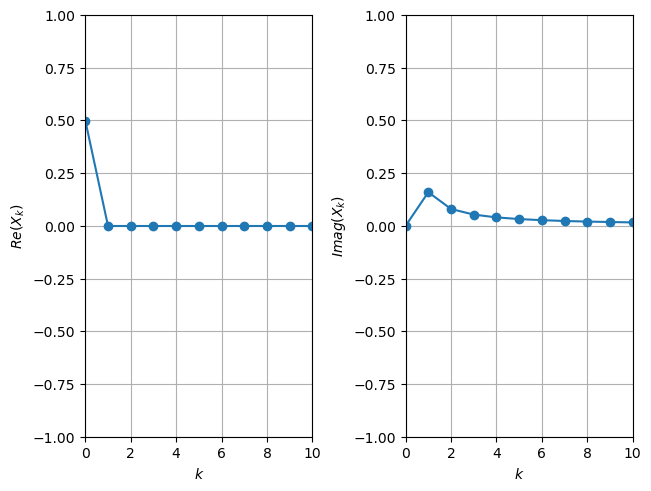

In [33]:
N = t.shape[0] # The numer of terms in the Fourier series
Xk = np.fft.fft(x)/N

# Plot Fourier coeffecients
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True)

n_terms = 10

ax1 = axs[0]
ax1.plot(np.arange(0,len(Xk)),np.real(Xk),"-o")
ax1.set_ylim(-1, 1)
ax1.set_xlim(0, 10)
ax1.grid()
ax1.set_ylabel('$Re(X_k)$');
ax1.set_xlabel('$k$');

ax2 = axs[1]
ax2.plot(np.arange(0,len(Xk)),np.imag(Xk),"-o")
ax2.set_ylim(-1, 1)
ax2.set_xlim(0, 10)
ax2.grid()
ax2.set_ylabel('$Imag(X_k)$');
ax2.set_xlabel('$k$');

The FFT use the complex format of the Fourier series, which is essentially only rewriting of the formula introducing Euler's formula $e^{i \omega t} = cos(\omega t) + i sin(\omega t)$. We define 

$$x_k = a_k -ib_k $$

$$ e^{-i\left(\frac{2\pi kt}{T} \right)} =cos\left(\frac{2\pi k}{T}t \right) - i sin\left(\frac{2\pi k}{T}t \right)  $$


$$x_k = \frac{1}{T} \int_{0}^{T}X(t) \left( cos\left(\frac{2\pi k}{T}t \right) - i sin\left(\frac{2\pi k}{T}t \right)  \right)dt$$

$$x_k = \frac{1}{T} \int_{0}^{T} X(t) e^{-i\left(\frac{2\pi kt}{T} \right)}dt$$

The relation between the Fourier coefficients obtained by using the cos and sin epressions $a_k$, and $b_k$ are related to the Fourier coefficients of the complex Fourier series as $X_k = a_k-ib_k$. The mean value is obtained by setting $k = 0$ in the complex Fourier series.

### Problem 2: Fourier transform and inverse Fourier transform

The Fourier transform of $x(t)$ and the inverse Fourier transforms are defined as follows:

$$  x(\omega) = \frac{1}{2\pi} \int_{-\infty}^{\infty} x(t) e^{-i\omega t} \: \text{d} t $$

$$  x(t) =  \int_{-\infty}^{\infty} x(\omega) e^{i\omega t} \: \text{d} \omega$$

a) Explain how the Forier transform and the inverse Fourier transform are related to Fourier series.

#### Solution

The Fourier series converges towards the Fourier transform as the number of terms and the considered time period goes to infinity. 


b) Take the inverse Fourier transform of the function below using numerical integration in python

  

$$ x(\omega) = \frac{1}{-\omega^2 m + i \omega  c + k} \quad (-\infty<\omega<\infty)$$

   Discuss the symmetry of $x(\omega)$ and how this affects $x(t)$ 
   
   You can assume $m=1$, $c=0.1$, and $k=4$
  
   **Hint:** Take a look at the examples in Github 
   
#### Solution

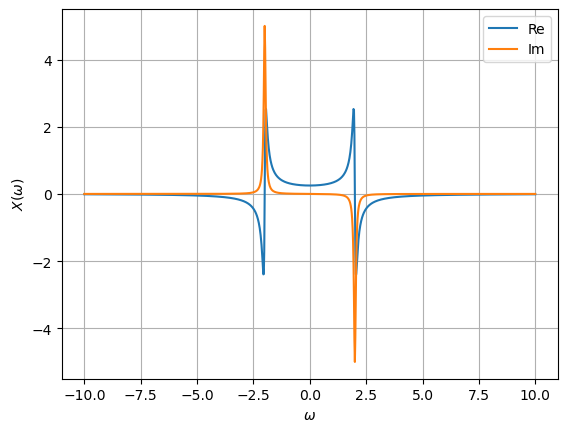

In [34]:
w = np.linspace(-10,10,1001) # Note that the number of points MUST be odd for symmetry reasons.
m = 1
c = 0.1
k = 4
X = 1/(-w**2*m + 1j*c*w + k)

plt.figure()
plt.plot(w,np.real(X),label="Re")
plt.plot(w,np.imag(X),label="Im")
plt.grid()
plt.xlabel("$\omega$")
plt.ylabel("$X(\omega)$")
plt.legend();

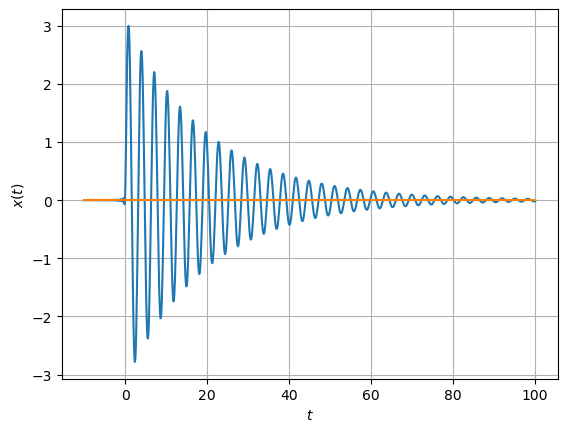

In [35]:
t = np.linspace(-10,100,1001)
x = np.zeros(len(t),dtype="complex")
for k in range(len(t)):
    x[k] = np.trapz(X*np.exp(1j*w*t[k]),w)
    
plt.figure()
plt.plot(t,np.real(x))
plt.plot(t,np.imag(x))
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
plt.grid()

We recognize that the inverse Fourier transform $x(t)$ is the impulse response function, since $x(\omega)$ is the frequency response function.

The real part of the function is symmetric while the imaginary part is asymmetric in the frequency domain. It is observed that 
the inverse Fourier transform of the function is zero for $t<0$. Some small values are observed when $t<0$ but this is related to the approximation that the numerical integration introduce since we are not able to integrate from minus to plus infinity.

### Problem 3: Auto-spectral density

The auto-correlation function of a stochastic process is defined as follows:

$$ R_X(\tau) = e^{-\alpha |\tau|} \cos(\omega_0 \tau) $$

a) Obtain the auto-spectral density of the stochastic process by taking the Fourier transform of the auto-correlation function. You can evaluate the Fourier integral numerically using Python. Assume $\alpha = 1$ and $\omega_0 = 10$.



b) The analytical Forier transfrom of the auto-correlation function is given below. Compare your numercial solution to the analytical resulst and discuss possible resons for any discrapencies that you observe.

$$ S_x(\omega)= \frac{1}{2\pi}\left(\frac{\alpha}{\alpha^2 + (\omega+\omega_0)^2} +  \frac{\alpha}{\alpha^2 + (\omega-\omega_0)^2} \right) $$

#### Solution
Let us first plot the auto-correlation function

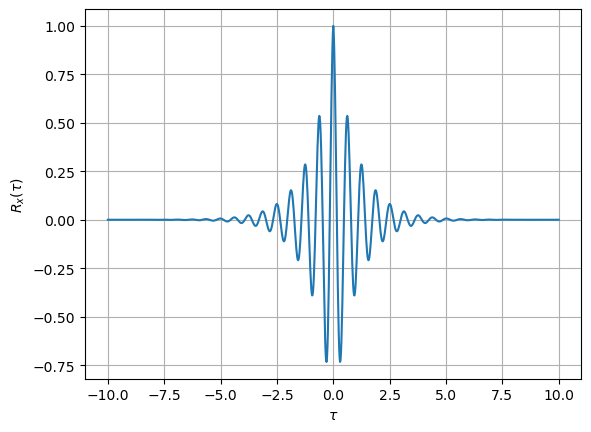

In [36]:
alpha = 1.0
w_0 = 10

tau = np.linspace(-10,10,1001)
R_x = np.exp(-alpha*np.abs(tau))*np.cos(w_0*tau)

plt.figure()
plt.plot(tau,R_x)
plt.ylabel("$R_x(\\tau)$")
plt.xlabel("$\\tau$")
plt.grid()

Next, find the Forier transform by numerical integration

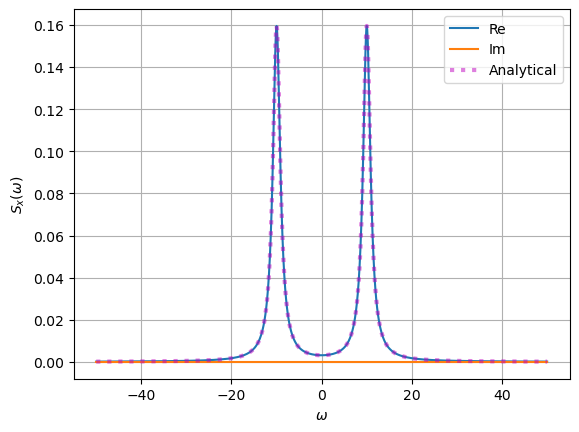

In [37]:
w = np.linspace(-50,50,1001)

S_x = np.zeros(len(w),dtype=complex)

for k in range(len(w)):
    S_x[k] = 1/2/np.pi*np.trapz(R_x*np.exp(-1j*w[k]*tau),tau)
    
    
S_x_analytical = (1*alpha/(alpha**2 + (w+w_0)**2)  + 1*alpha/(alpha**2 + (w-w_0)**2)) /2/np.pi      

plt.figure()
plt.plot(w,np.real(S_x),label="Re")
plt.plot(w,np.imag(S_x),label="Im")
plt.plot(w,S_x_analytical,":",label="Analytical",alpha=0.5, color='m', linewidth=3)
plt.grid()
plt.legend()
plt.xlabel("$\omega$")
plt.ylabel("$S_x(\omega)$");

The Fourier transform obtained by numerical integration perfectly corresponds to the analytical solution as long as the integration as long as the auto-correlation function is zero at the beginning and end of the time interval.

### Problem 4: Monte Carlo Simulations

a) The auto spectral density of the dynamic response of a single degree of freedom system subjected to white noise is defined as follows:

$$ S_y(\omega) = |H(\omega)|^2W_0  $$

Here, the frequency response-function is defined by

$$ H(\omega) = \frac{1}{-\omega^2 m + i \omega  c + k} $$

You can assume $m=1$, $c=0.1$, $k=4$ and $W_0 = 1$.

a) Plot the auto-spectral density of the response

#### Solution

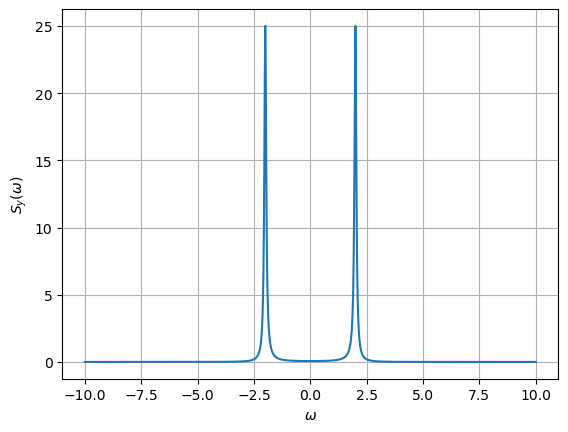

In [38]:
m = 1.0
k = 4.0
c = 0.1

W_0 = 1

w = np.linspace(-10,10,1001)
H = 1/(-w**2*m + 1j*w*c + k)

S_y = np.abs(H)**2*W_0

plt.figure()
plt.plot(w,S_y)
plt.xlabel("$\omega$")
plt.ylabel("$S_y(\omega)$")
plt.grid()

b) Use the plot of the auto-spectral density to find the natural frequency of the dynamic system.

#### Solution 
The peak of the aut-spectral density corresponds to the natural frequency of the system, since the response is dominated by this frequency when the system is subjected to white noise. From the auto-spectral density we can see that the natural frequency is about 2 rad/s.



c) Use the auto-spectral density to calculate the variance of the response.

#### Solution
The integral of the auto spectral density corresponds to the variance of the response. We can therfore find the variance by performing numerical integration of the auto-spectral density.

In [44]:
var = np.trapz(S_y,w)
print("The variance of the response is " + str(np.round(var*100)/100))

The variance of the response is 7.85


d) Use Monte-Carlo simulations to obtain realiations of the response. Make time series that are 600 seconds long and with a sufficeintly small time step. Use the following expression in your simulations

$$y(t) = \sum_{n=1}^{N}  A_k cos (\omega_kt + \phi_k) $$

$$A_k = \sqrt{2 S_y(\omega_k) \Delta \omega} $$

Here $S_y(\omega_k)$ is the auto-spectral density of the process, and $\phi_k$ is random phase angles evenly distributed between $0$ and $2\pi$


9.27721202411182


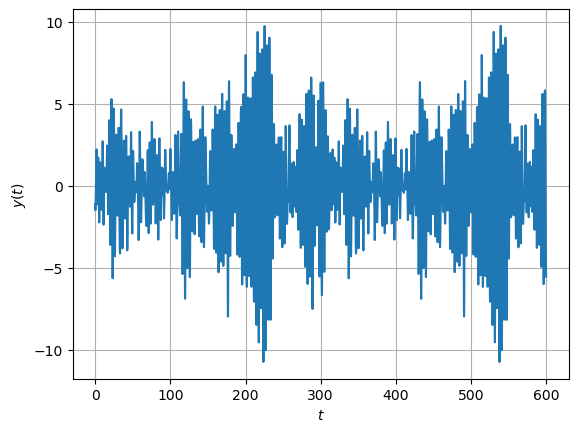

In [47]:
phi = np.random.rand(w.shape[0])*2*np.pi # Random phase angles 
t = np.linspace(0,600,6000) # Time vector
y = np.zeros(t.shape[0]) # Initialize the vector of x values
domega = w[1]-w[0] # Frequency spacing
for k in range(w.shape[0]):
    Ak = (2*S_y[k]*domega)**0.5 #Amplitude
    y = y + Ak * np.cos(w[k]*t+ phi[k]) # Sum the contibution from each harmonic component
    
plt.figure()
plt.plot(t,y);
plt.ylabel(r'$y(t)$')
plt.xlabel(r'$t$')
plt.grid()

print(np.var(y))